In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Intervalos de Confiança com Bootstrap

### Iris Dataset
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Array contendo comprimentos de Sépalas (Sepal Length)

In [ ]:
data = iris.data[:, :1]
data

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

### Calculando a Média ("Theta")

In [ ]:
import numpy as np
theta = np.mean(data)
theta

5.843333333333334

### Reamostragem (sklearn resample)

In [ ]:
from sklearn.utils import resample
sample = resample( ['A','B','C'], n_samples=3,  replace=True)
sample

['C', 'A', 'B']

Exemplo equivalente com Pandas

In [ ]:
import pandas as pd
df = pd.DataFrame(
    {
        "XX": ['A','B','C']
    }
)
sample_df = df.sample(n = 3, replace = True)
sample_df

,XX
1,B
0,A
0,A


Exemplo equivalente com Numpy

In [ ]:
sample = np.random.choice([1,2,3], size=2, replace=True)
sample

array([2, 1])

#### Amostra de 10%

In [ ]:
sample_size=int((len(data)*0.1))
x = resample(data, n_samples=sample_size, replace=False) # SEM reposição
x

array([[7.3],
       [4.5],
       [5.5],
       [5.7],
       [5.7],
       [6.4],
       [6.6],
       [5.8],
       [6.4],
       [5.6],
       [7.4],
       [4.8],
       [7.7],
       [7.2],
       [5. ]])

#### Média da Amostra

In [ ]:
np.mean(x)

6.106666666666667

### Distribuição Amostral

(Distribuição das Médias Amostrais)

(Distribuição Amostral da Média)

In [ ]:
theta_hat_list = list()
for i in range(1000):
  x = resample(data, n_samples=sample_size, replace=True) # com reposição
  theta_hat = np.mean(x)
  theta_hat_list.append(theta_hat)

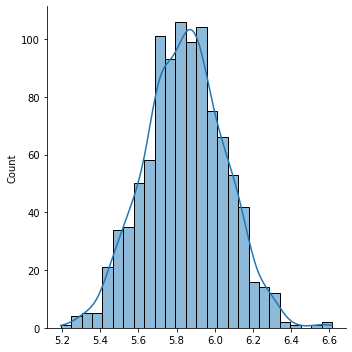

In [ ]:
import seaborn as sns
ax = sns.displot(theta_hat_list, kde=True)

### Erro Amostral

#### Erros em várias amostras

In [ ]:
for i in range(10):
  x = resample(x, replace=True)
  theta_error = np.mean(x) - theta
  print(theta_error)

-0.20333333333333403
-0.1366666666666676
-0.2233333333333345
-0.3166666666666673
-0.27000000000000135
-0.3166666666666673
-0.41000000000000014
-0.20333333333333403
-0.23000000000000131
-0.2566666666666668


#### Erro em muitas amostras (Distribuição do Erro Amostral)

In [ ]:
theta_hat_error_list = list()
for i in range(1000):
  x = resample(data, n_samples=sample_size, replace=True) # com reposição
  theta_hat_error = np.mean(x) - theta
  theta_hat_error_list.append(theta_hat_error)

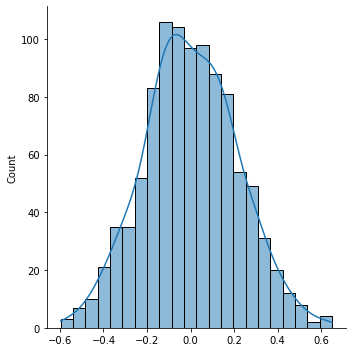

In [ ]:
import seaborn as sns
ax = sns.displot(theta_hat_error_list, kde=True)

### Artefatos para gerar o **Intervalo de Confiança**

In [ ]:
# Nível de confiança
alpha = 0.95

# Percentis
lower_p = ((1.0-alpha)/2.0) * 100
upper_p = (alpha+((1.0-alpha)/2.0)) * 100

# Valores dos Percentis
lower_value = np.percentile(theta_hat_error_list, lower_p)
upper_value = np.percentile(theta_hat_error_list, upper_p)

#Visualização dos valores calculados

print('Lower Percentile: %.3f' % lower_p)
print('Upper Percentile: %.3f' % upper_p)

print('Lower Value: %.3f' % lower_value)
print('Upper Value: %.3f' % upper_value)

Lower Percentile: 2.500
Upper Percentile: 97.500
Lower Value: -0.417
Upper Value: 0.424


#### Gráfico

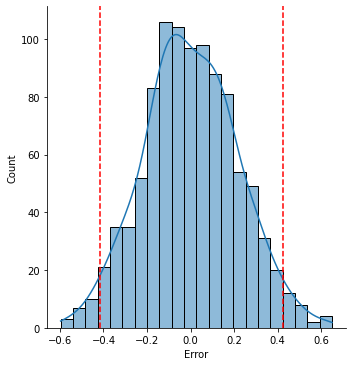

In [ ]:
import matplotlib.pyplot as plt

ax = sns.displot(theta_hat_error_list, kde=True)

#Apenas uma alternativa para gerar o gráfico
#ax = sns.histplot(theta_hat_error_list, stat="density", fill=True, color ='lightblue')
#ax = sns.kdeplot(theta_hat_error_list, color='blue')

plt.xlabel("Error")
plt.ylabel("Count")
plt.axvline(x=lower_value, linestyle="--", color='red')
plt.axvline(x=upper_value, linestyle="--", color='red')

#### Apenas um outro gráfico legal :-)

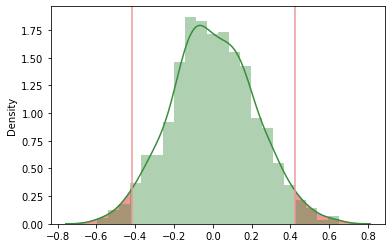

In [ ]:
ax = sns.distplot(theta_hat_error_list, hist=True, color='#388E3C')
kde_x, kde_y = ax.lines[0].get_data()

p1 = plt.axvline(x=lower_value,color='#EF9A9A')
p2 = plt.axvline(x=upper_value,color='#EF9A9A')

ax.fill_between(kde_x, kde_y, where=(kde_x<lower_value) | (kde_x>upper_value) , 
                interpolate=True, color='#EF9A9A')

plt.show()

#### Mais um gráfico legal 

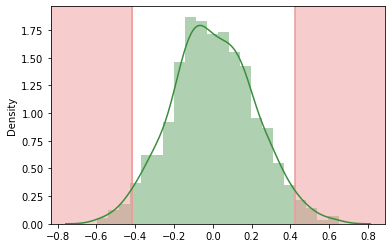

In [ ]:
#plotting the two lines
p1 = plt.axvline(x=lower_value,color='#EF9A9A')
p2 = plt.axvline(x=upper_value,color='#EF9A9A')

#plotting the PDF
ax = sns.distplot(theta_hat_error_list, hist=True,color='#388E3C')

xlim = ax.get_xlim()
ax.axvspan(xlim[0], lower_value, color='#EF9A9A', alpha=0.5)
ax.axvspan(upper_value, xlim[1], color='#EF9A9A', alpha=0.5)
ax.set_xlim(xlim)
plt.show()

### Cenário simulado (confrontando o Theta com o IC de uma determinada amostra)

In [ ]:
sample_size=int((len(data)*0.1))

x_test = resample(data, n_samples=sample_size, replace=False) # SEM reposição
theta_hat = np.mean(x_test)

lower_limit = theta_hat+lower_value
upper_limit = theta_hat+upper_value

print('Theta : %.3f' % theta)
print('Confidence Interval (%.f%%): %.3f to %.3f' % (alpha*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= theta <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 5.843
Confidence Interval (95%): 5.217 to 6.057
Contains Theta: True


### Gerando Vários Cenários Simulados (confrontando o Theta com o IC de uma determinada amostra)

In [ ]:
sample_size=int((len(data)*0.1))
for i in range(100): 
  x_test = resample(data, n_samples=sample_size, replace=False) # SEM reposição
  theta_hat = np.mean(x_test)
  lower_limit = theta_hat+lower_value
  upper_limit = theta_hat+upper_value
  contains_theta = (lower_limit <= theta <= upper_limit)
  print('%.3f -- %.3f | %s' % (lower_limit, upper_limit, contains_theta))
  

5.243 -- 6.083 | True
5.517 -- 6.357 | True
5.397 -- 6.237 | True
5.383 -- 6.224 | True
5.150 -- 5.990 | True
5.463 -- 6.304 | True
5.150 -- 5.990 | True
5.370 -- 6.210 | True
5.343 -- 6.183 | True
5.250 -- 6.090 | True
5.597 -- 6.437 | True
5.550 -- 6.390 | True
5.563 -- 6.404 | True
5.483 -- 6.324 | True
5.303 -- 6.144 | True
5.543 -- 6.384 | True
5.310 -- 6.150 | True
5.417 -- 6.257 | True
5.497 -- 6.337 | True
5.177 -- 6.017 | True
4.997 -- 5.837 | False
5.317 -- 6.157 | True
5.510 -- 6.350 | True
5.717 -- 6.557 | True
5.737 -- 6.577 | True
5.590 -- 6.430 | True
5.643 -- 6.484 | True
5.363 -- 6.204 | True
5.477 -- 6.317 | True
5.270 -- 6.110 | True
5.537 -- 6.377 | True
5.377 -- 6.217 | True
5.637 -- 6.477 | True
5.303 -- 6.144 | True
5.490 -- 6.330 | True
5.483 -- 6.324 | True
5.257 -- 6.097 | True
5.030 -- 5.870 | True
5.343 -- 6.184 | True
5.783 -- 6.624 | True
5.623 -- 6.464 | True
5.423 -- 6.264 | True
5.250 -- 6.090 | True
5.457 -- 6.297 | True
5.643 -- 6.484 | True
5.197 -- 

# Bootstrapping

#### Implementando uma Função para Simplificar nosso Código

In [ ]:
def bootstrap(data, alpha=0.95, n_rep=100):
  
  theta_hat_error_list = list()
  theta = np.mean(data)
  
  # Resampling
  for i in range(0,n_rep):
    x = resample(data, replace=True)
    theta_hat_error = np.mean(x) - theta
    theta_hat_error_list.append(theta_hat_error)

  # Percentiles
  lower_p = ((1.0-alpha)/2.0) * 100
  upper_p = (alpha+((1.0-alpha)/2.0)) * 100

  # Lower and Upper Bounds
  lower_value = np.percentile(theta_hat_error_list, lower_p)
  upper_value = np.percentile(theta_hat_error_list, upper_p)

  lower_limit = theta+lower_value
  upper_limit = theta+upper_value

  return theta, lower_limit, upper_limit


### Cenário simulado (confrontando o Theta com o IC de uma determinada amostra)

In [ ]:
sample_size=int((len(data)*0.20))
sample_to_bootstrap = resample(data, n_samples=sample_size, replace=False) # SEM reposição

theta_bs, lower_limit, upper_limit = bootstrap(sample_to_bootstrap)

print('Theta : %.3f' % theta_bs)
print('Confidence Interval (%.f%%): %.3f to %.3f' % (alpha*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= theta_bs <= upper_limit)
print('Contains BS Theta:', contains_theta)

contains_theta = (lower_limit <= theta <= upper_limit)
print('Contains Real Theta:', contains_theta)

Theta : 5.800
Confidence Interval (95%): 5.513 to 6.058
Contains BS Theta: True
Contains Real Theta: True


### Gerando Vários Cenários Simulados (confrontando o Theta com o IC de uma determinada amostra)

In [ ]:
sample_size=int((len(data)*0.1))

for i in range(100): 
  sample_to_bootstrap = resample(data, n_samples=sample_size, replace=False) # SEM reposição
  theta_bs, lower_limit, upper_limit = bootstrap(sample_to_bootstrap, alpha=0.95)
  contains_theta = (lower_limit <= theta <= upper_limit) # real theta (population)
  print('%.3f -- %.3f | %s' % (lower_limit, upper_limit, contains_theta))

5.488 -- 6.254 | True
5.376 -- 6.163 | True
5.323 -- 6.084 | True
5.378 -- 6.262 | True
5.289 -- 5.994 | True
5.633 -- 6.324 | True
5.433 -- 6.191 | True
5.273 -- 5.970 | True
5.522 -- 6.451 | True
5.405 -- 6.364 | True
5.445 -- 6.214 | True
5.351 -- 6.087 | True
5.809 -- 6.804 | True
5.442 -- 6.144 | True
5.693 -- 6.362 | True
5.290 -- 6.199 | True
5.467 -- 6.320 | True
5.314 -- 5.920 | True
5.173 -- 5.798 | False
5.666 -- 6.478 | True
5.493 -- 6.047 | True
5.853 -- 6.494 | False
5.453 -- 6.273 | True
5.316 -- 5.891 | True
5.547 -- 6.397 | True
5.219 -- 6.247 | True
5.280 -- 6.240 | True
5.778 -- 6.467 | True
5.313 -- 6.138 | True
5.250 -- 5.797 | False
5.039 -- 5.752 | False
5.386 -- 6.068 | True
5.396 -- 6.171 | True
5.697 -- 6.344 | True
5.567 -- 6.157 | True
5.866 -- 6.437 | False
5.403 -- 6.303 | True
5.786 -- 6.561 | True
5.593 -- 6.390 | True
5.326 -- 6.067 | True
5.480 -- 6.251 | True
5.689 -- 6.452 | True
5.547 -- 6.354 | True
5.443 -- 6.470 | True
5.729 -- 6.567 | True
5.449

### Visualização

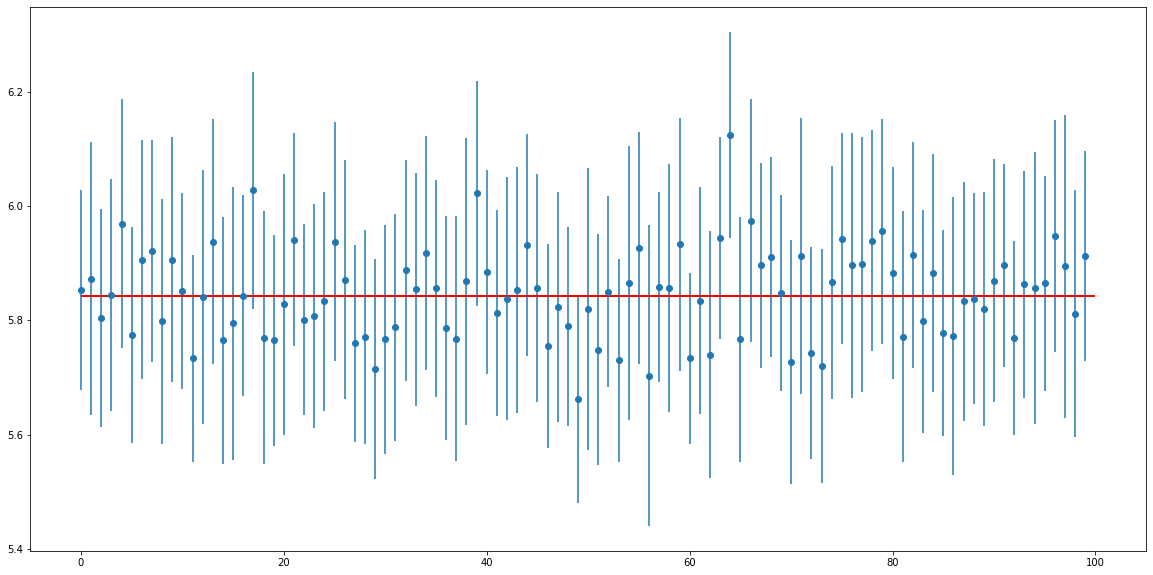

In [ ]:
sample_size=int((len(data)*0.4))
intervals = []
thetas_hat = []
n_rep=100

for i in range(n_rep): 
  sample_to_bootstrap = resample(data, n_samples=sample_size, replace=False) # SEM reposição
  theta_bs, lower_limit, upper_limit = bootstrap(sample_to_bootstrap, alpha=0.95)
  thetas_hat.append(theta_bs)
  intervals.append((lower_limit, upper_limit))

plt.figure(figsize=(20,10))

plt.errorbar(x=np.arange(0, n_rep, 1), 
             y=thetas_hat, 
             yerr=[(ur-lr)/2 for ur,lr in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=n_rep,
           y=theta, 
           linewidth=2.0,
           color="red");

## Recebendo uma função como parâmetro

In [ ]:
def bootstrap_flex(data, func, alpha=0.95, n_rep=1000):
  
  theta_hat_error_list = list()
  theta = func(data)
  
  # Resampling
  for i in range(n_rep):
    x = resample(data, replace=True)
    theta_hat_error = func(x) - theta
    theta_hat_error_list.append(theta_hat_error)

  # Percentiles
  lower_p = ((1.0-alpha)/2.0) * 100
  upper_p = (alpha+((1.0-alpha)/2.0)) * 100

  # Lower and Upper Bounds
  lower_value = np.percentile(theta_hat_error_list, lower_p)
  upper_value = np.percentile(theta_hat_error_list, upper_p)

  lower_limit = theta+lower_value
  upper_limit = theta+upper_value

  return theta, lower_limit, upper_limit

### Gerando Vários Cenários Simulados (confrontando o Theta com o IC de uma determinada amostra)

In [ ]:
sample_size=int((len(data)*0.1))

for i in range(100): 
  sample_to_bootstrap = resample(data, n_samples=sample_size, replace=False) # SEM reposição
  theta_bs, lower_limit, upper_limit = bootstrap_flex(sample_to_bootstrap, np.mean, alpha=0.95)
  contains_theta = (lower_limit <= theta <= upper_limit) # real theta (population)
  print('%.3f -- %.3f | %s' % (lower_limit, upper_limit, contains_theta))

5.660 -- 6.434 | True
5.680 -- 6.400 | True
5.266 -- 6.094 | True
5.367 -- 6.120 | True
5.447 -- 6.280 | True
5.493 -- 6.167 | True
5.386 -- 6.293 | True
5.407 -- 6.220 | True
5.646 -- 6.367 | True
5.240 -- 5.993 | True
5.546 -- 6.334 | True
5.587 -- 6.374 | True
5.333 -- 6.107 | True
5.306 -- 6.007 | True
5.393 -- 6.273 | True
5.353 -- 5.934 | True
5.313 -- 6.087 | True
5.107 -- 5.900 | True
5.293 -- 6.067 | True
5.353 -- 6.094 | True
5.640 -- 6.373 | True
5.273 -- 5.807 | False
5.340 -- 5.900 | True
5.880 -- 6.674 | False
5.346 -- 6.500 | True
5.353 -- 6.340 | True
5.567 -- 6.513 | True
5.687 -- 6.527 | True
5.313 -- 5.967 | True
5.347 -- 6.147 | True
5.360 -- 5.900 | True
5.346 -- 6.174 | True
5.426 -- 6.294 | True
5.580 -- 6.200 | True
5.180 -- 5.907 | True
5.680 -- 6.327 | True
5.253 -- 6.100 | True
5.260 -- 6.207 | True
5.280 -- 5.940 | True
5.860 -- 6.554 | False
5.580 -- 6.367 | True
5.267 -- 6.067 | True
5.460 -- 6.240 | True
5.700 -- 6.533 | True
5.319 -- 6.360 | True
5.706 -

### Biblioteca para Bootstrap

Scipy:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

# Intervalo de Confiança a partir da Teoria Central do Limite (TCL)

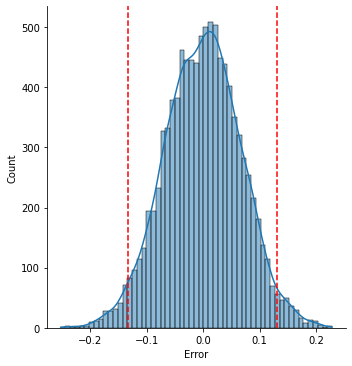

In [ ]:
import math

# Distribution
new_std = np.std(data) / math.sqrt(len(data))
distr = np.random.normal(0, new_std, 10000)

# Lower and Upper Bounds

alpha=0.95

lower_p = ((1.0-alpha)/2.0) * 100
upper_p = (alpha+((1.0-alpha)/2.0)) * 100

lower_value = np.percentile(distr, lower_p)
upper_value = np.percentile(distr, upper_p)

ax = sns.displot(distr, kde=True)

plt.xlabel("Error")
plt.ylabel("Count")
plt.axvline(x=lower_value, linestyle="--", color='red')
plt.axvline(x=upper_value, linestyle="--", color='red')

In [ ]:
lower_limit = theta+lower_value
upper_limit = theta+upper_value

print('Theta : %.3f' % np.mean(data))
print('Confidence Interval (%.f%%): %.3f to %.3f' % (alpha*100, lower_limit, upper_limit))

Theta : 5.843
Confidence Interval (95%): 5.709 to 5.975


### Alternativa usando os z-values (constantes)

In [ ]:
distr = np.random.normal(loc=0, scale=1, size=10000)
z_value = np.percentile(distr, 97.5)
z_value

1.9535153188575978

In [ ]:
lower_value = -z_value * (new_std)
upper_value = z_value * (new_std)

lower_limit = theta+lower_value
upper_limit = theta+upper_value

print('Theta : %.3f' % np.mean(data))
print('Confidence Interval (%.f%%): %.3f to %.3f' % (alpha*100, lower_limit, upper_limit))

Theta : 5.843
Confidence Interval (95%): 5.712 to 5.975


Tabela para consultar os z-values:

http://www.ltcconline.net/greenl/courses/201/estimation/smallConfLevelTable.htm